In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Data preprocessing

## Helper functions

In [2]:
def standardize(X):
    return (X - np.mean(X)) / np.std(X)


def normalize(X):
    return (X - np.min(X)) / (np.max(X) - np.min(X))


## Import the dataset

In [3]:
dataset = pd.read_csv('./../data/train.csv')

## Explore the dataset

In [4]:
dataset.drop(labels=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True, axis=1)
print(pd.DataFrame(data=dataset))

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

     Survived  Pclass     Sex   Age
0           0       3    male  22.0
1           1       1  female  38.0
2           1       3  female  26.0
3           1       1  female  35.0
4           0       3    male  35.0
5           0       3    male   NaN
6           0       1    male  54.0
7           0       3    male   2.0
8           1       3  female  27.0
9           1       2  female  14.0
10          1       3  female   4.0
11          1       1  female  58.0
12          0       3    male  20.0
13          0       3    male  39.0
14          0       3  female  14.0
15          1       2  female  55.0
16          0       3    male   2.0
17          1       2    male   NaN
18          0       3  female  31.0
19          1       3  female   NaN
20          0       2    male  35.0
21          1       2    male  34.0
22          1       3  female  15.0
23          1       1    male  28.0
24          0       3  female   8.0
25          1       3  female  38.0
26          0       3    mal

## Taking care of missing data

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 2:3])
X[:, 2:3] = imputer.transform(X[:, 2:3])
print(pd.DataFrame(X))

     0       1        2
0    3    male       22
1    1  female       38
2    3  female       26
3    1  female       35
4    3    male       35
5    3    male  29.6991
6    1    male       54
7    3    male        2
8    3  female       27
9    2  female       14
10   3  female        4
11   1  female       58
12   3    male       20
13   3    male       39
14   3  female       14
15   2  female       55
16   3    male        2
17   2    male  29.6991
18   3  female       31
19   3  female  29.6991
20   2    male       35
21   2    male       34
22   3  female       15
23   1    male       28
24   3  female        8
25   3  female       38
26   3    male  29.6991
27   1    male       19
28   3  female  29.6991
29   3    male  29.6991
..  ..     ...      ...
861  2    male       21
862  1  female       48
863  3  female  29.6991
864  2    male       24
865  2  female       42
866  2  female       27
867  1    male       31
868  3    male  29.6991
869  3    male        4
870  3    male  

## Categorical data - Encoding the independent variables

In [6]:
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
print(pd.DataFrame(X))

     0  1        2
0    3  1       22
1    1  0       38
2    3  0       26
3    1  0       35
4    3  1       35
5    3  1  29.6991
6    1  1       54
7    3  1        2
8    3  0       27
9    2  0       14
10   3  0        4
11   1  0       58
12   3  1       20
13   3  1       39
14   3  0       14
15   2  0       55
16   3  1        2
17   2  1  29.6991
18   3  0       31
19   3  0  29.6991
20   2  1       35
21   2  1       34
22   3  0       15
23   1  1       28
24   3  0        8
25   3  0       38
26   3  1  29.6991
27   1  1       19
28   3  0  29.6991
29   3  1  29.6991
..  .. ..      ...
861  2  1       21
862  1  0       48
863  3  0  29.6991
864  2  1       24
865  2  0       42
866  2  0       27
867  1  1       31
868  3  1  29.6991
869  3  1        4
870  3  1       26
871  1  0       47
872  1  1       33
873  3  1       47
874  2  0       28
875  3  0       15
876  3  1       20
877  3  1       19
878  3  1  29.6991
879  1  0       56
880  2  0       25
881  3  1   

In [7]:
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()
print(pd.DataFrame(X))

       0    1    2          3
0    0.0  1.0  3.0  22.000000
1    1.0  0.0  1.0  38.000000
2    1.0  0.0  3.0  26.000000
3    1.0  0.0  1.0  35.000000
4    0.0  1.0  3.0  35.000000
5    0.0  1.0  3.0  29.699118
6    0.0  1.0  1.0  54.000000
7    0.0  1.0  3.0   2.000000
8    1.0  0.0  3.0  27.000000
9    1.0  0.0  2.0  14.000000
10   1.0  0.0  3.0   4.000000
11   1.0  0.0  1.0  58.000000
12   0.0  1.0  3.0  20.000000
13   0.0  1.0  3.0  39.000000
14   1.0  0.0  3.0  14.000000
15   1.0  0.0  2.0  55.000000
16   0.0  1.0  3.0   2.000000
17   0.0  1.0  2.0  29.699118
18   1.0  0.0  3.0  31.000000
19   1.0  0.0  3.0  29.699118
20   0.0  1.0  2.0  35.000000
21   0.0  1.0  2.0  34.000000
22   1.0  0.0  3.0  15.000000
23   0.0  1.0  1.0  28.000000
24   1.0  0.0  3.0   8.000000
25   1.0  0.0  3.0  38.000000
26   0.0  1.0  3.0  29.699118
27   0.0  1.0  1.0  19.000000
28   1.0  0.0  3.0  29.699118
29   0.0  1.0  3.0  29.699118
..   ...  ...  ...        ...
861  0.0  1.0  2.0  21.000000
862  1.0  

C:\Python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Python37\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Splitting the dataset into the Training set and Test set

In [8]:
X = X[:, [2, 3]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature scaling

Um Vergleiche mit anderen Variablen anstellen zu können, transformiert man eine Variable so, dass Mittelwert $\mu$ = 0 und Standardabweichung $\sigma$ = 1 wird.

In [9]:
'''
print('X: ', X, '\n')
print('mean: ', np.mean(X), '\n')
print('std: ', np.std(X), '\n')

print('X_stand: ', standardize(X), '\n')
print('X_norm: ', normalize(X), '\n')

print('mean(X_stand): ', np.mean(X_stand), '\n')
print('std(X_stand): ', np.std(X_stand), '\n')
'''

"\nprint('X: ', X, '\n')\nprint('mean: ', np.mean(X), '\n')\nprint('std: ', np.std(X), '\n')\n\nprint('X_stand: ', standardize(X), '\n')\nprint('X_norm: ', normalize(X), '\n')\n\nprint('mean(X_stand): ', np.mean(X_stand), '\n')\nprint('std(X_stand): ', np.std(X_stand), '\n')\n"

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(pd.DataFrame(X_train))

            0         1
0    0.830129 -0.143587
1    0.830129 -0.992755
2    0.830129  0.010807
3    0.830129 -0.606770
4   -0.364971  1.168764
5    0.830129 -0.375178
6    0.830129 -0.915558
7    0.830129  0.242399
8   -0.364971 -0.452375
9    0.830129 -0.297981
10   0.830129 -0.606770
11  -1.560071  2.017932
12   0.830129 -0.143587
13  -1.560071  0.396793
14  -0.364971 -1.841923
15  -0.364971  0.859976
16   0.830129 -0.012420
17   0.830129 -0.012420
18  -1.560071  1.709144
19   0.830129  0.165202
20  -0.364971  0.396793
21  -1.560071 -0.915558
22   0.830129 -0.012420
23   0.830129 -0.012420
24   0.830129 -0.012420
25   0.830129 -0.012420
26   0.830129 -0.220784
27   0.830129 -0.606770
28   0.830129 -1.069952
29  -1.560071  1.477552
..        ...       ...
638 -0.364971 -0.683967
639  0.830129  0.937173
640 -1.560071  0.010807
641  0.830129 -0.915558
642 -1.560071 -0.012420
643 -0.364971 -0.143587
644 -1.560071  2.017932
645  0.830129 -0.012420
646 -0.364971 -0.220784
647 -1.560071  0

# Classification model

## Fitting logistic regression to the training set

In [11]:
#classifier = LinearRegression()
#classifier.fit(X_train, y_train)

#classifier = LogisticRegression(random_state=0)

classifier = KNeighborsClassifier()

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Predicting the test set results

In [12]:
y_pred = classifier.predict(X_test)

## Confusion matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[112  27]
 [ 44  40]]


# Visualisation

## Import and data preprocessing

## Visualising the training set result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


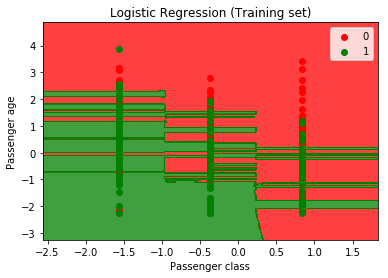

In [14]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Passenger class')
plt.ylabel('Passenger age')
plt.legend()
plt.show()

## Visualising the test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


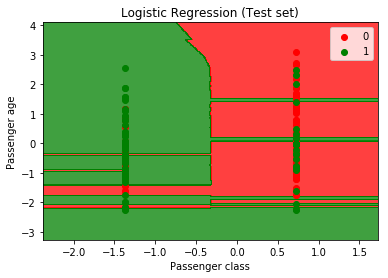

In [180]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Passenger class')
plt.ylabel('Passenger age')
plt.legend()
plt.show()